<a href="https://colab.research.google.com/github/min02yam/wether/blob/main/IDW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.라이브러리 로드

In [3]:
install.packages("raster")
library(raster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘terra’


Loading required package: sp



## 1.1 데이터 로드
1. dat은 학교와 각 말라리아율의 위치정보를 갖고 있음
2. ehhopia_adm은 연구할 장소의 지리적 데이터 

In [1]:
dat = read.csv("https://raw.githubusercontent.com/HughSt/HughSt.github.io/master/course_materials/week1/Lab_files/Data/mal_data_eth_2009_no_dups.csv",header=T)

In [4]:
ethopia_adm = raster::getData("GADM", country="ETH", level=1)

Warning message in raster::getData("GADM", country = "ETH", level = 1):
“getData will be removed in a future version of raster
. You can use access these data, and more, with functions from the geodata package instead”


## 1.2 데이터 이해하기

In [5]:
names(dat)

[1] "country"      "country_id"   "continent_id" "site_id"      "site_name"   
 [6] "latitude"     "longitude"    "rural_urban"  "year_start"   "lower_age"   
[11] "upper_age"    "examined"     "pf_pos"       "pf_pr"        "method"      
[16] "title1"       "citation1"

In [7]:
#options(tibble.width = Inf)
head(dat)

,country,country_id,continent_id,site_id,site_name,latitude,longitude,rural_urban,year_start,lower_age,upper_age,examined,pf_pos,pf_pr,method,title1,citation1
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
1,Ethiopia,ETH,Africa,6694,Dole School,5.9014,38.9412,UNKNOWN,2009,4,15,220,0,0.000000000,Microscopy,"School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.","Ashton, RA, Kefyalew, T, Tesfaye, G, Pullan, RL, Yadeta, D, Reithinger, R, Kolaczinski, JH and Brooker, S (2011). <b>School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.</b> <i>Malaria Journal</i>, <b>10</b>(1):25"
2,Ethiopia,ETH,Africa,8017,Gongoma School,6.3175,39.8362,UNKNOWN,2009,4,15,216,0,0.000000000,Microscopy,"School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.","Ashton, RA, Kefyalew, T, Tesfaye, G, Pullan, RL, Yadeta, D, Reithinger, R, Kolaczinski, JH and Brooker, S (2011). <b>School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.</b> <i>Malaria Journal</i>, <b>10</b>(1):25"
3,Ethiopia,ETH,Africa,12873,Buriya School,7.5674,40.7521,UNKNOWN,2009,4,15,127,0,0.000000000,Microscopy,"School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.","Ashton, RA, Kefyalew, T, Tesfaye, G, Pullan, RL, Yadeta, D, Reithinger, R, Kolaczinski, JH and Brooker, S (2011). <b>School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.</b> <i>Malaria Journal</i>, <b>10</b>(1):25"
4,Ethiopia,ETH,Africa,6533,Arero School,4.7192,38.7650,UNKNOWN,2009,4,15,56,0,0.000000000,Microscopy,"School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.","Ashton, RA, Kefyalew, T, Tesfaye, G, Pullan, RL, Yadeta, D, Reithinger, R, Kolaczinski, JH and Brooker, S (2011). <b>School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.</b> <i>Malaria Journal</i>, <b>10</b>(1):25"
5,Ethiopia,ETH,Africa,4150,Gandile School,4.8930,37.3632,UNKNOWN,2009,4,15,219,0,0.000000000,Microscopy,"School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.","Ashton, RA, Kefyalew, T, Tesfaye, G, Pullan, RL, Yadeta, D, Reithinger, R, Kolaczinski, JH and Brooker, S (2011). <b>School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.</b> <i>Malaria Journal</i>, <b>10</b>(1):25"
6,Ethiopia,ETH,Africa,1369,Melka Amana School,6.2461,39.7891,UNKNOWN,2009,4,15,215,1,0.004651163,Microscopy,"School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.","Ashton, RA, Kefyalew, T, Tesfaye, G, Pullan, RL, Yadeta, D, Reithinger, R, Kolaczinski, JH and Brooker, S (2011). <b>School-based surveys of malaria in Oromia Regional State, Ethiopia: a rapid survey method for malaria in low transmission settings.</b> <i>Malaria Journal</i>, <b>10</b>(1):25"


#2. Inverse Distance Weighing (IDW)

## 2.1 observation window(owin) 생성

In [10]:
install.packages("spatstat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘polyclip’, ‘spatstat.sparse’, ‘abind’, ‘tensor’, ‘goftest’, ‘spatstat.data’, ‘spatstat.geom’, ‘spatstat.random’, ‘spatstat.core’, ‘spatstat.linnet’, ‘spatstat.utils’




In [11]:
suppressMessages(library(spatstat))
oromia = ethopia_adm[ethopia_adm$NAME_1=="Oromia",]
obs_window = owin(oromia@bbox[1,], oromia@bbox[2,])

In [14]:
obs_window

window: rectangle = [34.1395, 42.97985] x [3.509659, 10.386869] units

## 2.2 Creation of point pattern object.
일단 owin이 정의 되면, 다음 단계에는 point pattern object(ppp)를 특정한 owin안에 생성해야함. Marks are added as atttribute value to each point (falciparum rate).

In [15]:
ppp_malaria=ppp(dat$longitude,dat$latitude,
                         marks=dat$pf_pr,window=obs_window)

In [16]:
ppp_malaria

Marked planar point pattern: 203 points
marks are numeric, of storage type  ‘double’
window: rectangle = [34.1395, 42.97985] x [3.509659, 10.386869] units

## 2.3 Creating idw object.
IDW 오브젝트는 spatstat 라이브러리의 idw 함수를 사용해서 생성됨.
IDW를 활용한 보간법은 power, at 아규먼트에 의해 결정적으로 정의되어 지는거 이해하는거 매우 중요함. We shall be using a power value of 0.05 and “at” argument pixels for illustration.

In [22]:
idw_malaria = idw(ppp_malaria, power=0.05, at="pixels")

In [19]:
?idw

## 2.4 Visualisation of interpolated results.

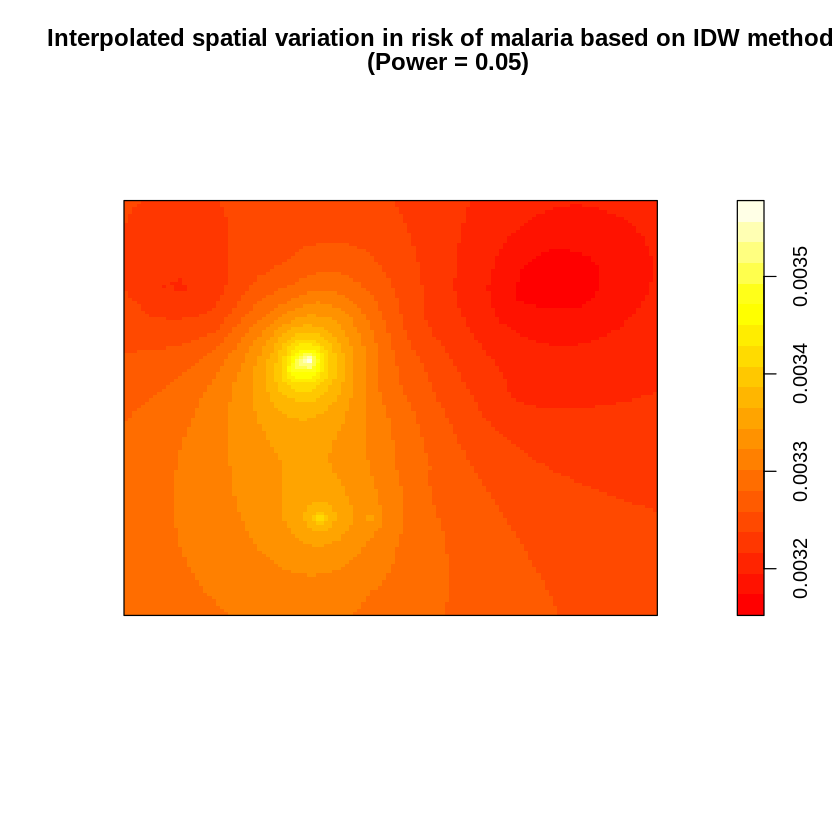

In [23]:
plot(idw_malaria,
     col=heat.colors(20), 
     main="Interpolated spatial variation in risk of malaria based on IDW method \n (Power = 0.05)") 

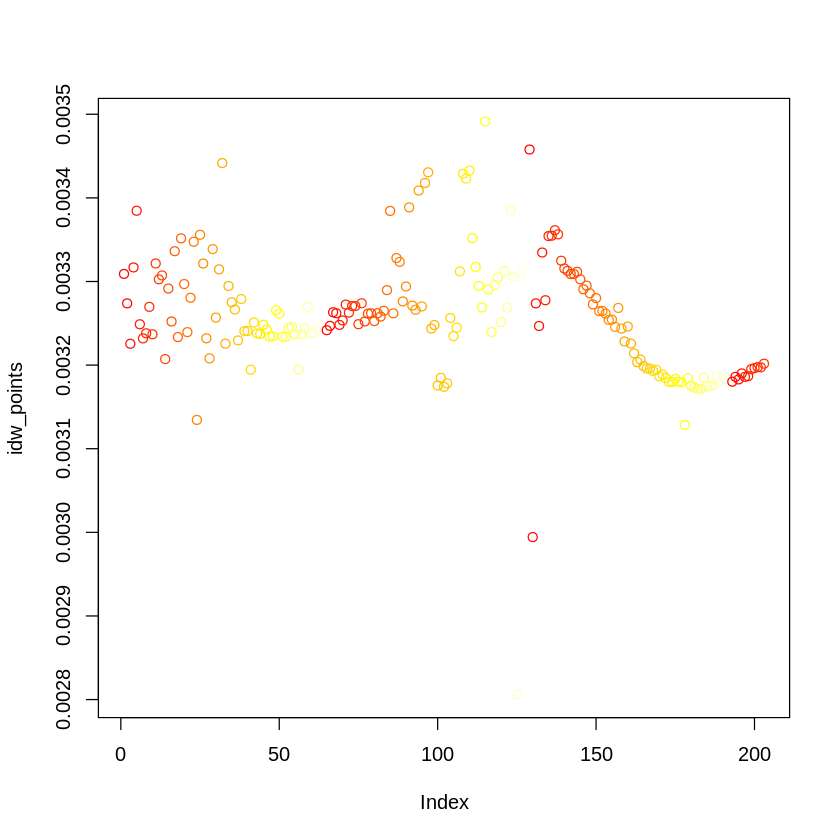

In [24]:
idw_points <- idw(ppp_malaria, power = 0.05, at = "points")
plot(idw_points, 
     col=heat.colors(64))

https://rpubs.com/Dr_Gurpreet/interpolation_idw_R